# Stock Spans

Chapter 1 of [Real World Algorithms](https://mitpress.mit.edu/books/real-world-algorithms).

---

> Panos Louridas<br />
> Athens University of Economics and Business

# Stacks in Python

There is no special stack data structure in Python, as all the required functionality is provided by lists.

We push something on the stack by appending it to the end of the list, calling `append()` on the list.

We pop something from the stack by calling `pop()` on the list.

In [1]:
stack = [3, 4, 5]
stack.append(6)
stack.append(7)
stack

[3, 4, 5, 6, 7]

In [2]:
stack.pop()

7

In [3]:
stack

[3, 4, 5, 6]

In [4]:
stack.pop()

6

In [5]:
stack

[3, 4, 5]

In [6]:
stack.pop()

5

In [7]:
stack

[3, 4]

# The Stock Span Problem in Python

We will work with data for the Dow Jones Industrial Average (DJIA) of the New York Stock Exchange.

Before we start, let us see how the DJIA has evolved over time.

The following lines require knowledge of special Python libraries; don't worry if you don't understand them.

If you do want to run them, you have to install the [`pandas`](http://pandas.pydata.org/) and [`matplotlib`](https://matplotlib.org/) libraries, and enter them in a Jupyter notebook.

The file [djia.csv](djia.csv) contains the DJIA from the start to 2015.

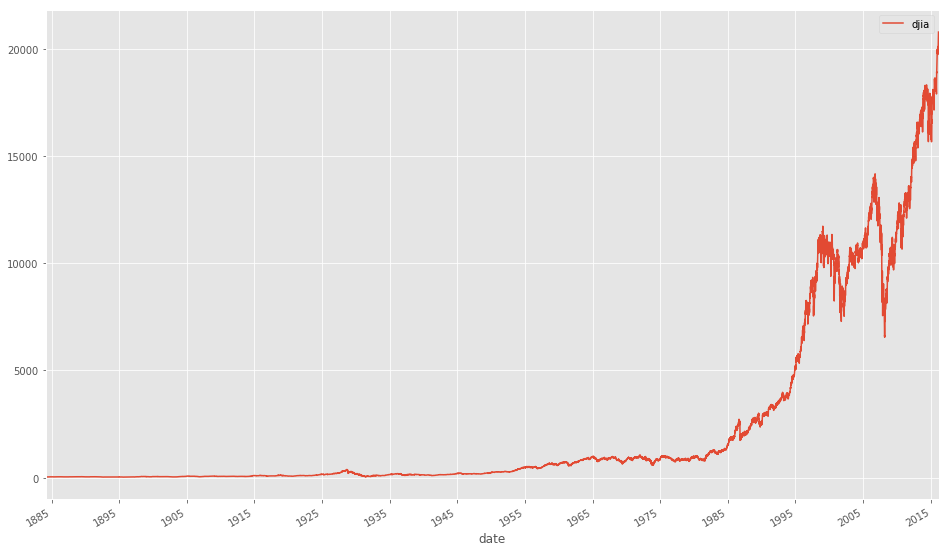

In [8]:
import pandas as pd
import matplotlib
import matplotlib.dates as mdates

%matplotlib inline
matplotlib.style.use('ggplot')

df = pd.read_csv("djia.csv", comment="#", parse_dates=[0], index_col=0, names=["date", "djia"])
plt = df.plot(figsize=(16, 10))
plt.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
min_x = df.index.min()
max_x = df.index.max()
plt.set_xlim([min_x, max_x])
ticks = pd.date_range(start=min_x, end=max_x, freq='10A')
_ = plt.set_xticks(ticks)

Now back to basics.

The following Python function implements the simple stock span algorithm.

It takes as input a list `quotes` with the DJIA closing values, one per day.

It returns a list `spans` with the stock spack for every day.

In [21]:
def simple_stock_span(quotes):
    spans = []
    for i in range(len(quotes)):
        k = 1
        span_end = False
        while i - k >= 0 and not span_end:
            if quotes[i - k] <= quotes[i]:
                k += 1
            else:
                span_end = True
        spans.append(k)
    return spans

To use this function we must have constructed the `quotes` list.

The following function takes a file that contains the DJIA data and returns the `quotes` list.

The file has the following format:
```
2016-02-25,16697.29
2016-02-24,16484.99
2016-02-23,16431.78
2016-02-22,16620.66
```

Also, note that some lines in the file start with `#`. These are comments and we will ignore them.

So our function will read the file line-by-line and return the list `quotes`, which will contain the second item of each line (the DJIA value).

To split the line, we use the `split()` function, which splits a string into pieces, breaking the string at the places it finds the separator that we specify. The expression `parts = line.split(',')` breaks the line at the comma and returns the pieces in `parts`.

In [10]:
def read_quotes(filename):
    quotes = []
    with open(filename) as quotes_file:
        for line in quotes_file:
            if line.startswith('#'):
                continue
            parts = line.split(',')
            quotes.append(float(parts[-1]))
    return quotes


Then for the file [djia.csv](djia.csv), we do the following:

In [11]:
quotes = read_quotes("djia.csv")

Let's check how many lines we've read:

In [12]:
len(quotes)

36230

Now we can call `simple_stock_span(quotes)` and print some stock spans.

In [13]:
spans = simple_stock_span(quotes)
print(quotes[-1630:-1620])

[10269.47, 10320.1, 10447.93, 10340.69, 10387.01, 10415.24, 10462.77, 10544.13, 10526.49, 10572.73]


Out of curiosity, let's find the greatest stock span.

We'll use the Python's `max()` function.

`max()` takes two arguments: where to search for the maximum, and how to search in it.

We want it to search in tuples of the form `(date_index, span_value)`, and use the second item of each tuple (at position 1, starting from 0) for the comparison.

In [14]:
import operator

max_index, max_value = max(enumerate(spans), key=operator.itemgetter(1))

with open('djia.csv') as quotes_file:
  for i, line in enumerate(quotes_file):
    if i == max_index:
      print(max_value, line)
      break

36230 2/13/2017,20412.16



Now we will examine how long does `simple_stock_span(quotes)` take to run.

We will run it 10 times, we will count the time, and we will keep the best time.

To measure time we will use the `time()` function from the `time` library. 

This function returns the time elapsed in seconds from 1/1/1970. The decimal part of the returned value depends on the precision of the clock of our machine.

In [24]:
import time

min_time_taken = 10**10

for i in range(10):
    time_start = time.time()
    simple_stock_span(quotes)
    time_end = time.time()
    time_diff = time_end - time_start
    if time_diff < min_time_taken:
        min_time_taken = time_diff
        
print("Best time was",  1000 * min_time_taken, "milliseconds.")
    

Best time was 1251.5439987182617 milliseconds.


We will contrast that result with a stack-based implementation.

The stack-based stock span algorithm in Python is as follows:

In [16]:
def stack_stock_span(quotes):
    spans = [1]
    s = []
    s.append(0)
    for i in range(1, len(quotes)):
        while len(s) != 0 and quotes[s[-1]] <= quotes[i]:
            s.pop()
        if len(s) == 0:
            spans.append(i+1)
        else:
            spans.append(i - s[-1])
        s.append(i)
    return spans

We call it in the same way:

In [17]:
spans = stack_stock_span(quotes)
print(spans[-10:])

[1, 36222, 36223, 36224, 36225, 36226, 36227, 36228, 36229, 36230]


And we can measure the time it takes:

In [25]:
min_time_taken = 10**10

for i in range(10):
    time_start = time.time()
    stack_stock_span(quotes)
    time_end = time.time()
    time_diff = time_end - time_start
    if time_diff < min_time_taken:
        min_time_taken = time_diff
        
print("Best time was",  1000 * min_time_taken, "milliseconds.")

Best time was 35.22610664367676 milliseconds.


We see that from about 1250 milliseconds we went down to about 35 milliseconds.

As $\sqrt(1250) \approx 35$, our results and theory agree, as we went from $O(n^2)$ to $O(n)$.

For completeness, here is the full code:

In [20]:
import time

def simple_stock_span(quotes):
    spans = []
    for i in range(len(quotes)):
        k = 1
        span_end = False
        while i - k >= 0 and not span_end:
            if quotes[i - k] <= quotes[i]:
                k += 1
            else:
                span_end = True
        spans.append(k)
    return spans

def stack_stock_span(quotes):
    spans = [1]
    s = []
    s.append(0)
    for i in range(1, len(quotes)):
        while len(s) != 0 and quotes[s[-1]] <= quotes[i]:
            s.pop()
        if len(s) == 0:
            spans.append(i+1)
        else:
            spans.append(i - s[-1])
        s.append(i)
    return spans
    

def read_quotes(filename):
    quotes = []
    with open(filename) as quotes_file:
        for line in quotes_file:
            if line.startswith('#'):
                continue
            parts = line.split(',')
            quotes.append(parts[-1])
    return quotes

quotes = read_quotes("djia.csv")

min_time_taken = 10**10

for i in range(10):
    time_start = time.time()
    simple_stock_span(quotes)
    time_end = time.time()
    time_diff = time_end - time_start
    if time_diff < min_time_taken:
        min_time_taken = time_diff
        
print("Time for simple algorithm:", min_time_taken, "seconds.")

min_time_taken = 10**10

for i in range(10):
    time_start = time.time()
    stack_stock_span(quotes)
    time_end = time.time()
    time_diff = time_end - time_start
    if time_diff < min_time_taken:
        min_time_taken = time_diff
        
print("Time for stack-based algorithm:", min_time_taken, "seconds.")

Time for simple algorithm: 1.2999579906463623 seconds.
Time for stack-based algorithm: 0.034986019134521484 seconds.
